In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

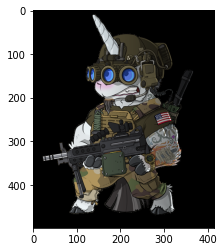

In [2]:
img = cv2.imread('./images/artwork_atest28.png', 1)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
def RGB2HEX(color):
    return f"#{int(color[0]):02x}{int(color[1]):02x}{int(color[2]):02x}"

In [46]:
number_of_colors = 6
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

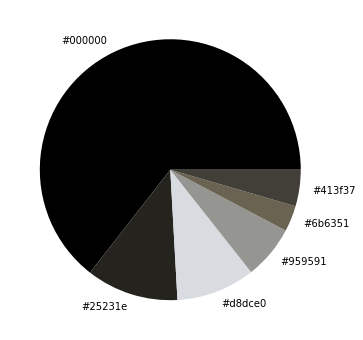

In [47]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]


plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
plt.savefig('./images/artwork_atest28_color_pie.jpg');

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

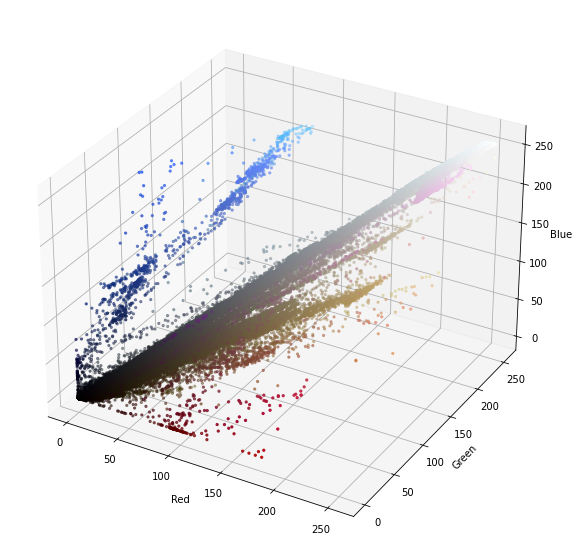

In [42]:
r, g, b = cv2.split(image)
fig = plt.figure(figsize=(15,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

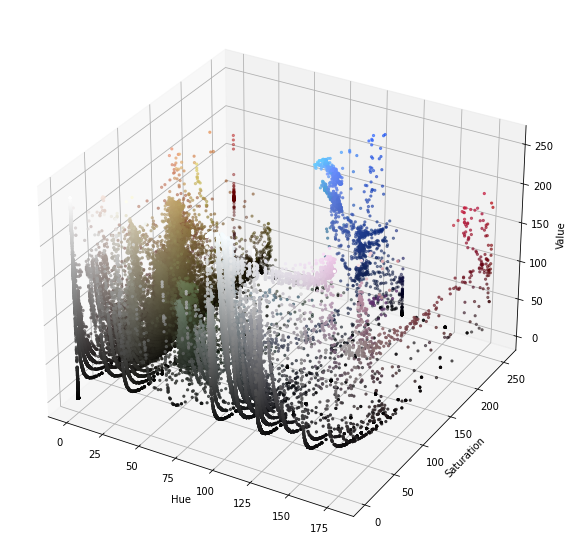

In [43]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_image)
fig = plt.figure(figsize=(15,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()